#**Hackaton Qiskit Fall Fest 2025**

Equipe: Lucas Alves Margonato / Luiza Amaral da Gama Pinto

lucas.margonato@aluno.ufabc.edu.br

luiza.amaral@aluno.ufabc.edu.br

---

##Projeto: **Circuito Quântico Comparador de 2 Qubits**

Instalar as seguintes bibliotecas para rodar o Qiskit:

In [50]:
%pip install -q qiskit qiskit-aer pylatexenc matplotlib

In [51]:
%matplotlib inline
from IPython.display import display
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.circuit.library import *
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_state_qsphere, plot_state_city, plot_histogram
from qiskit_aer import Aer, AerSimulator
from qiskit.providers.basic_provider import BasicSimulator
import qiskit, math
from numpy import pi

In [52]:
# Versão do Qiskit
qiskit.__version__

'2.2.3'

##**Descrição do Circuito Quântico**

Circuito projetado na plataforma Composer da IBM. Disponível em: https://quantum.cloud.ibm.com/composer.

###Objetivo
Nosso objetivo com este circuito é demonstrar, de forma didática, a implementação de um circuito clássico da computação tradicional na computação quântica. E, a partir disso, mostrar e explicar conceitos quânticos utilizados. Desta forma, conseguimos utilizar de algo conhecido como lógica booleana como porta de entrada para compreender a computação quântica.

###Resultados esperados e aplicações
É esperado que o circuito criado seja capaz de realizar a comparação entre 2 QuBits de forma probabilística, ou seja, analisando todas as possibilidades de relações entre esses dois QuBits.

Esse circuito tem sua aplicação no ensino de computação quântica, visto que parte de um lugar conhecido por muitos que já estão na área da ciência/engenharia/programação que é a lógica booleana. Isso permite uma introdução ao Qiskit que é palatável ao mesmo tempo que introduz aos poucos os conceitos da física quântica presentes na programação de computadores quânticos.

##O circuito comparador
Um circuito comparador clássico é um circuito relativamente simples que tem sua saída levada a um quando os bits de sua entrada são iguais. Para isso, pode-se usar uma porta lógica chamada XNOR (a inversa de um OU exclusivo).

Como não temos portas lógicas assim prontas no QISKIT, precisamos construir ela aos poucos.
O primeiro passo para então compreendermos o circuito quântico é entender como constrói-se um comparador com portas lógicas mais simples, desmembrando a XNOR.
Para isso, vamos olhar a tabela-verdade que queremos. Adicionalmente, além do "=" vamos adicionar saídas para A < B e A > B.


| A | B | A = B | A > B | A < B |
| :---: | :---: | :---: | :---: | :---: |
| 0 | 0 | 1 | 0 | 0 |
| 0 | 1 | 0 | 0 | 1 |
| 1 | 0 | 0 | 1 | 0 |
| 1 | 1 | 1 | 0 | 0 |

Conseguimos construir a nossa saída A=B (vamos chamar ela de AeqB):
$AeqB = (\neg A \text{ AND } \neg B) \text{ OR } (A \text{ AND } B)$

Por fim, as outras duas saídas A>B (AgreatB) e A<B (BgreatA):

$AgreatB =  A \text{ AND } \neg B$

$BgreatA = \neg A \text{ AND }  B$

Agora que temos isso, conseguimos partir para a mapeamento do circuito quântico.


##CBit vs QuBit
Antes de partir para a construção do nosso circuito, é preciso fazer uma distinção importante. Circuitos clássicos booleanos (como o que estamos usando de base, o comparador clássico) utilizam os bits clássicos como unidade de informação. Esses bits podem ser 0 ou 1.

Os computadores quânticos têm como unidade de informação os QuBits. Descrevemos eles com estados. O estado de um QuBit é uma combinação da probabilidade de ele ser zero ou um quando ele for observado. Observar um qubit faz com que ele caia em um dos estados Por isso dizemos que os computadores quânticos realizam computações probabilísticas e não determinísticas.

##Passo 1: construindo os blocos

##A e B
Vamos precisar de algumas coisas para construir o circuito que queremos. Mas para isso, podemos dividir o problema em alguns problemas menores e depois juntar as peças no quebra cabeça final.
Podemos iniciar pensando em como criar um circuito cuja saída seja o equivalente quântico de $ A \text{ AND } B$.



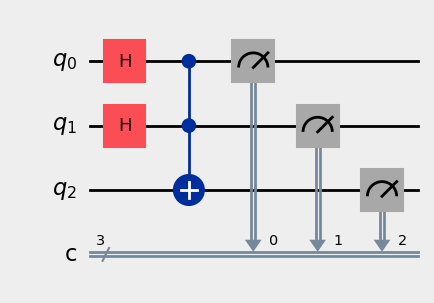

In [53]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#Aplica a operação Haddamard em ambos os qubits para colocá-los em superposição
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

#Operação 'E controlado controlado' com origem q0 e q1 e alvo q2
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])

#Mede os valores dos qubits
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

Esse circuito acima utiliza duas portas de operações: Hadamard e Toffoli. A operação Toffoli ou "E controlado controlado" aplica uma **inversão** no qubit alvo (q2) **se** ambos os controles (q0 e q1) forem 1. Como o circuito inicia com todos os qubits em zero, temos que q2 é invertido do estado $|0\rangle$ para o estado $|1\rangle$ apenas se ambos q1 e q2 estiverem no estado $|1\rangle$.

###Superposição
A outra operação, a operação Hadamard é a que nos permite colocar os qubits em superposição. Isso significa que ao aplicar essa operação o qubit sai do estado $|0\rangle$ inicial e passa para um estado com iguais probabilidades de ser 0 ou 1.

*Isso é extremamente importante pois nos permite testar as 4 possibilidades de entrada de uma vez.*

###Emaranhamento
Aqui, mais um fenômeno quântico extremamente importante acontece e é utilizado. Quando utilizamos a operação de Toffoli (ou CCX) o qubit 2 passa a estar emaranhado com os qubits 0 e 1. Isso significa que a leitura do qubit 2 permite instantaneamente saber o estado dos qubits 0 e 1, mesmo sem observá-los diretamente. Pela lógica que acabamos de ver, q2 só é invertido de 0 para 1 quando q0 e q1 são 1. Logo, observando q2 como 1, já sabemos o estado do sistema como um todo.

Nesse sentido, esses qubits deixam de ser independentes. Podemos dizer que a superposição é o que permite que os computadores quânticos processarem volumes muito grandes de informação, pois processam vários estados de uma vez. Já o emaranhamento é o que permite o processamento dessas informações e o que faz com que a computação quântica vá além dos limites da computação clássica.

###Medições
Por fim, as portas de medições permitem observar o qubit e mapeá-lo para um cbit. Quando fazemos isso o qubit "colapsa" para um dos estados possíveis, saindo da superposição e podemos rodar o circuito muitas vezes e fazer um histograma para conseguir ter noção da probabilidade de cada saída do circuito. Abaixo, pode-se observar que este circuito tem o q2 em 1 apenas quando q0 e q1 são 1, o que significa que conseguimos construir nossa porta AND!

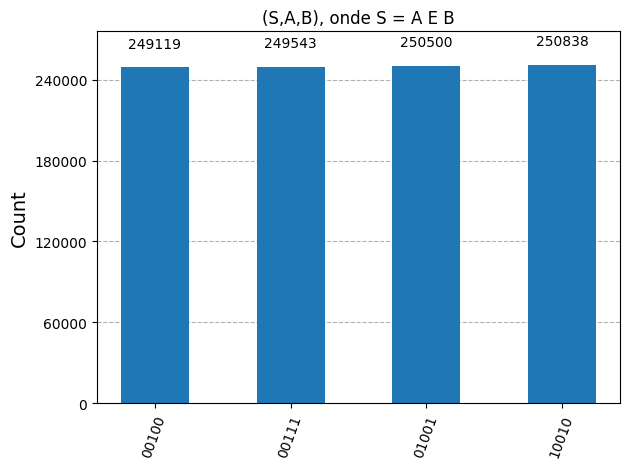

In [75]:
sim = BasicSimulator()
counts = sim.run(circuit, shots=1000000).result().get_counts()
plot_histogram(counts, title='(S,A,B), onde S = A E B')

##A OR B
Para criar esta operação vamos precisar utilizar o teorema de deMorgan. Este teorema nos diz que podemos "trocar" uma porta OR por uma porta AND se seguirmos a seguinte regra:

$\neg(A \text{ OR } B) = \neg A \text{ AND } \neg B$

Podemos aplicar mais uma NOT em ambos os lados para conseguir o que queremos:

$\neg(\neg(A \text{ OR } B)) = \neg(\neg A \text{ AND } \neg B)$

$A \text{ OR } B = \neg(\neg A \text{ AND } \neg B)$

Assim conseguimos usar a porta AND que já possuímos para construir a porta OR.

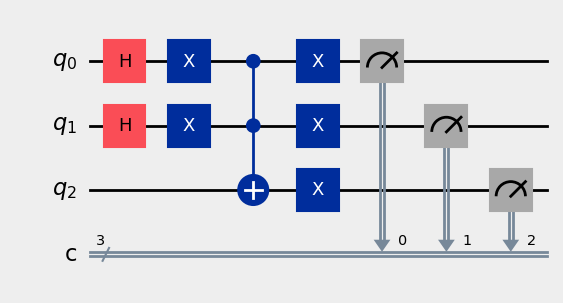

In [55]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#Aplica a operação Haddamard em ambos os qubits para colocá-los em superposição
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

#inverte ambas as entradas
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])

#Operação 'E controlado controlado' com origem q0 e q1 e alvo q2
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[2])

#Desinverte os valores da entrada para serem medidos
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])


#Mede os valores dos qubits
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

display(circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'}))

Além das operações já vistas, aqui utilizamos a operação NOT (X) que simplesmente inverte o estado de um qubit. Do ponto de vista do estado em si, podemos pensar que se o estado de um qubit for $a|0\rangle + b|1\rangle$ após a operação X ele se torna: $b|0\rangle + a|1\rangle$.

Observando o histograma abaixo, conseguimos confirmar a criação da porta OR!

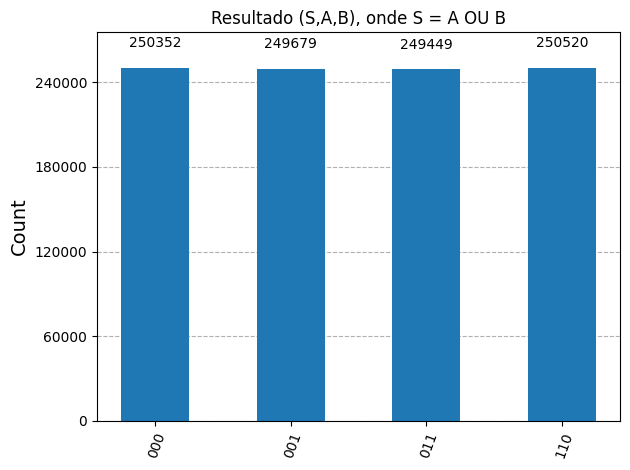

In [69]:
sim = BasicSimulator()
counts = sim.run(circuit, shots=1000000).result().get_counts()
display(plot_histogram(counts, title='Resultado (S,A,B), onde S = A OU B')

##Passo 2: Implementação dos Comparadores Separadamente

Agora que conseguimos mapear os blocos que precisávamos para circuitos quânticos, precisamos juntá-los para criar os comparadores. Antes de fazer tudo num mesmo circuito, vamo criar cada um dos comparadores separadamente e depois juntá-los todos num comparador completo.

###Comparador de A maior que B
Resgatando a expressão que obtivemos lá no começo:

$AgreatB = \neg A \text{ AND } B$

Agora conseguimos montá-la num circuito da seguinte forma:

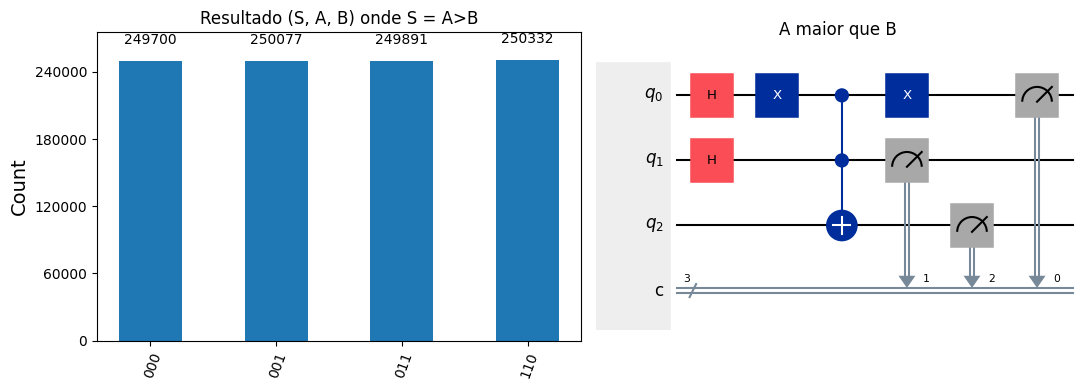

In [76]:
import matplotlib.pyplot as plt

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])    #B
circuit.h(qreg_q[1])    #A

circuit.x(qreg_q[0])    #Inverte o B

circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.x(qreg_q[0])    #Desinverte o B para medição

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

#Roda a simulação e plota o grafico e o circuito lado a lado
sim = BasicSimulator()
counts = sim.run(circuit, shots=1000000).result().get_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
# Modifica o título do histograma para incluir a legenda desejada
plot_histogram(counts, title='Resultado (S, A, B) onde S = A AND not B', ax=ax1)
ax1.set_title('Resultado (S, A, B) onde S = A>B')
circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'}, ax=ax2)
ax2.set_title('A maior que B')
plt.tight_layout()
plt.show()

##B maior que A
Para obter B maior que A, basta utilizar o mesmo circuito que A maior que B e trocar os dois portões inversores que estão no q0 (B) para o q1 (A).

##A igual a B
Relembrando a expressão que obtemos antes:

$AeqB = (A \text{ AND } B) \text{ OR } (\neg A \text{ AND } \neg B)$

Este é o mais complicado dos três comparadores, por que precisamos realizar mais de uma computação envolvendo os dois qubits de entrada. Por conta disso vamos precisar de mais dois qubits.

A ideia aqui é a seguinte: vamos começar realizando a operação q0 E q1, tendo como alvo q2.


```
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
```

Em seguida vamos inverter ambos as entradas e fazer novamente q0 E q1 mas dessa vez tendo como alvo q3

```
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.id(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
```
Aqui podemos ver uma nova operação, a operação de identidade. Como o próprio nome já diz ela simplesmente mantém o valor do qubit como ele mesmo, mas existe para garantir o *timing* das computações. Assim, todos os dados chegam ao mesmo tempo nos mesmo lugares e evitamos erros.

Com isso feito, desinvertemos os qubits de entrada para poder medí-los e usamos o qubit 4 para realizar a operação OU a partir do circuito que vimos anteriormente.


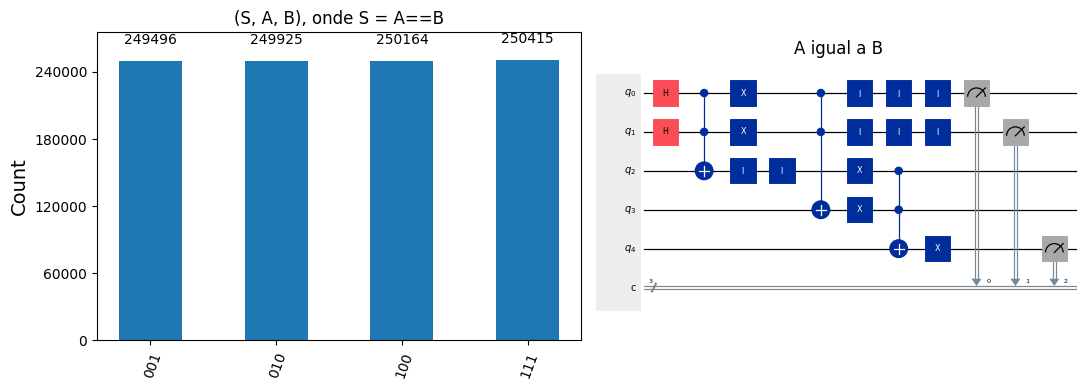

In [77]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.id(qreg_q[2])
circuit.id(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.x(qreg_q[2])
circuit.x(qreg_q[3])
circuit.id(qreg_q[0])
circuit.id(qreg_q[1])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.id(qreg_q[0])
circuit.id(qreg_q[1])
circuit.x(qreg_q[4])
circuit.id(qreg_q[1])
circuit.id(qreg_q[0])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[4], creg_c[2])

sim = BasicSimulator()
counts = sim.run(circuit, shots=1000000).result().get_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
plot_histogram(counts, title='Circuito "A AND not B"', ax=ax1)
circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'}, ax=ax2)
ax1.set_title('(S, A, B), onde S = A==B')
ax2.set_title('A igual a B')
plt.tight_layout()
plt.show()

##Passo 3: Comparador Completo
Feito o comparador de igualdade, juntar os outros dois comparadores a ele não é difícil.

Como vamos ter mais dois resultados, vamos precisar de mais dois qubits além de mais dois cbits.

A última coisa que fizemos nos qubits de entrada foi invertê-los, então, se invertermos um novamente ele voltará ao seu estado inicial.

Assim, vamos começar invertendo q0 para que volte a seu estado inicial e adicionando uma operação 'inversora controlada controlada' (AND ou Toffoli) com alvo em q5.

Agora, invertemos novamente q0 e q1 (para que tenhamos ~q0 e q1) e colocamos a AND que criamos com alvo em q6.

Por fim, invertemos q0 mais uma vez para garantir que volte a seu estado inicial para a medida.

Podemos economizar código utilizando o espaço das operações de identidade de q1 e q2 no comparador para realizar essa integração final.

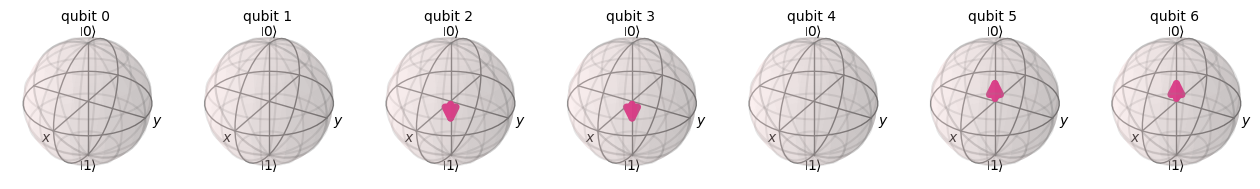

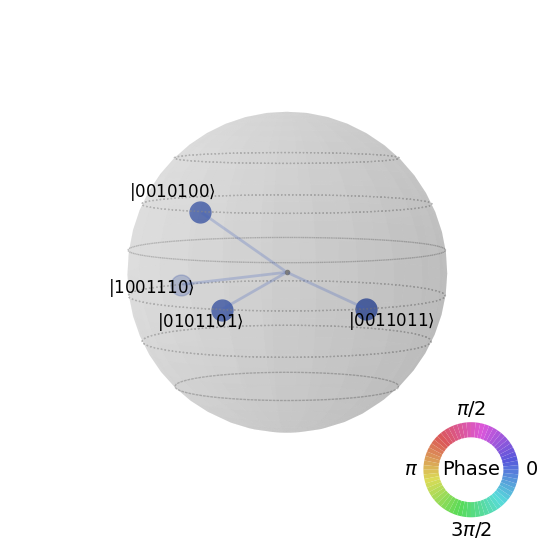

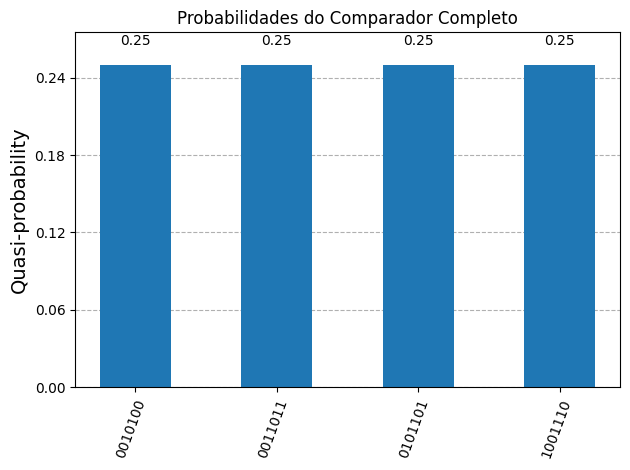

In [79]:
qreg_q = QuantumRegister(7, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.id(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.id(qreg_q[2])
circuit.x(qreg_q[2])
circuit.x(qreg_q[3])
circuit.x(qreg_q[0])
circuit.id(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[6])
circuit.x(qreg_q[0])

# Apresenta o estado dos Quibits antes da medição.

display(plot_bloch_multivector(Statevector(circuit)))
sv = Statevector(circuit)
display(plot_state_qsphere(sv))

probs = sv.probabilities_dict()

# Histograma com as probabilidades ideais do circuito
display(plot_histogram(probs, title='Probabilidades Ideais do Comparador Completo'))

# Realiza a medição de Q[0] e Q[1], os bits sendo comparados, e Q[4], o bit de resposta do circuito.
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[4], creg_c[2])
circuit.measure(qreg_q[5], creg_c[3])
circuit.measure(qreg_q[6], creg_c[4])

No histograma de probabilidades ideais vale apontar que os vetores são representados na forma de $\lbrack q6,q5,...,q1,q0 \rbrack $.
Este histograma apresenta as probabilidades **antes de os qubits serem medidos**, ou seja, representam as probabilidades ideais do circuito quântico.

Se lembrarmos onde cada um dos nossos comparadores estão (q0 == q1 em q4, q0>q1 em q5 e q0<q1 em q6), veremos que o nosso circuito está funcionando perfeitamente, e obtendo os resultados esperados (pelo menos idelamente). Podemos finalmente simular o circuito muitas vezes para confirmar o resultado.

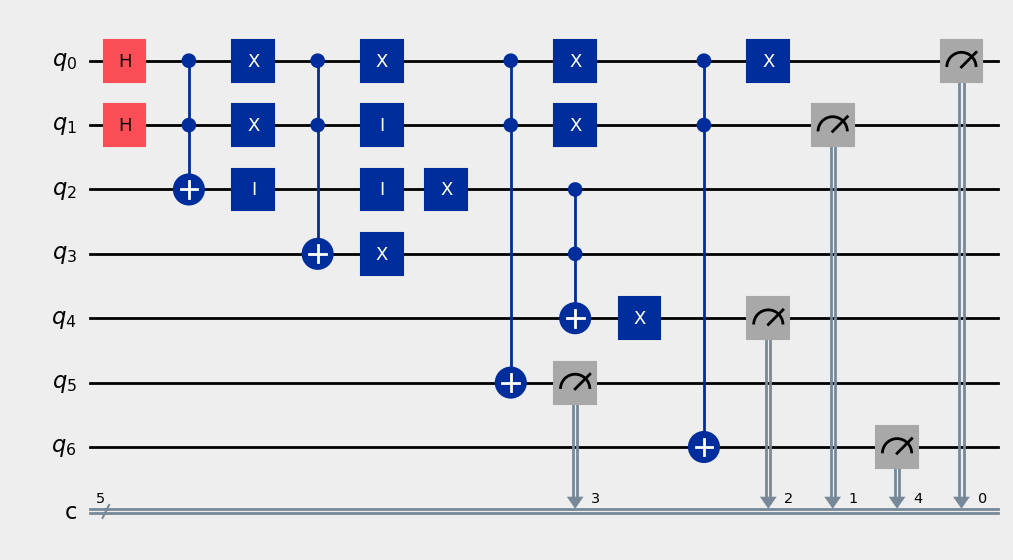

In [61]:
# Apresenta um diagrama do circuito quântico apresentado anteriormente.
circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

##**Resultados da Simulação Final**

Podemos observar que, como esperado o sistema tem 4 estados possíveis e tem 25% de chance de cair em algum deles. Também podemos ver que seguindo a ordem:

q0 -> c0

q1 -> c1

q4 -> c3 (comparador de igualdade)

q5 -> c4 (comparador q0>q1)

q6 -> c5 (comparador q0<q1)

O sistema funciona como esperado, comparando os qubits da entrada.

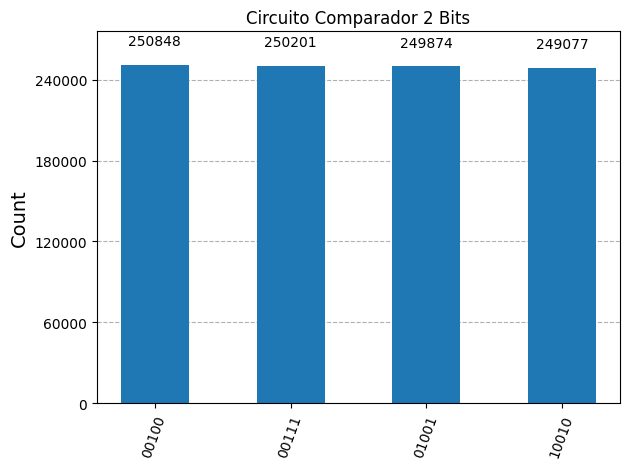

In [62]:
sim = BasicSimulator()
counts = sim.run(circuit, shots=1000000).result().get_counts()
plot_histogram(counts, title='Circuito Comparador 2 Bits')